In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('reddit_preprocessing.csv').dropna(subset=['clean_comment'])
df.head()

,clean_comment,category
0,"film absolutely awful, but nevertheless, hilar...",0
1,well since seeing part 1 3 honestly say never ...,0
2,got see film preview dazzled it. not typical r...,1
3,adaptation positively butcher classic beloved ...,0
4,rzone awful movie! simple. seems tried make mo...,0


In [4]:
# Train-Test Split
X = df['clean_comment']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
# Cell 5: Hyperparameter Tuning
nb = MultinomialNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]  # Laplace smoothing parameter
}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

best_nb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.5}


In [8]:
# Model Evaluation
y_pred = best_nb.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8711
Precision: 0.8713
Recall: 0.8711
F1-score: 0.8711

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2486
           1       0.88      0.86      0.87      2495

    accuracy                           0.87      4981
   macro avg       0.87      0.87      0.87      4981
weighted avg       0.87      0.87      0.87      4981



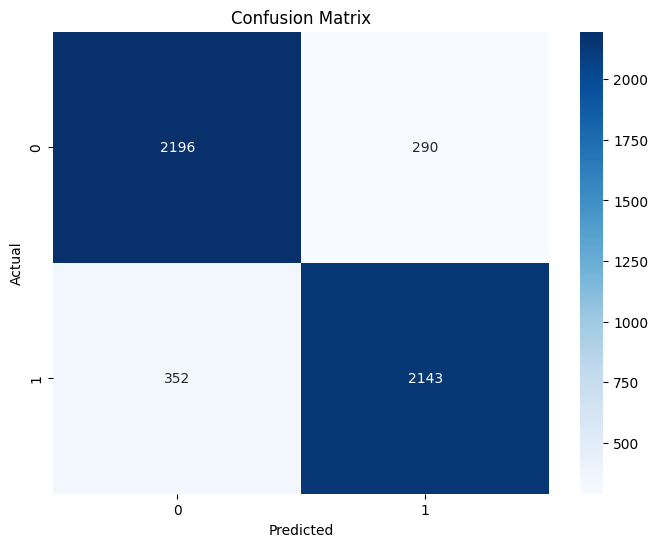

In [9]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()